In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

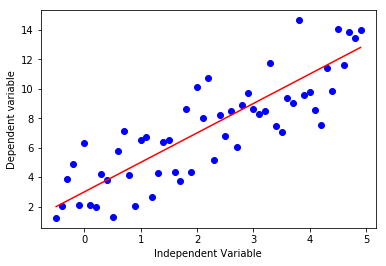

In [3]:
x = np.arange(-0.5,5.0,0.1)

y = 2*(x) + 3
y_noise = 2* np.random.normal(size=x.size)
ydata = y + y_noise

plt.plot(x, ydata, 'bo')
plt.plot(x,y, 'r')
plt.ylabel('Dependent variable')
plt.xlabel('Independent Variable')
plt.show()

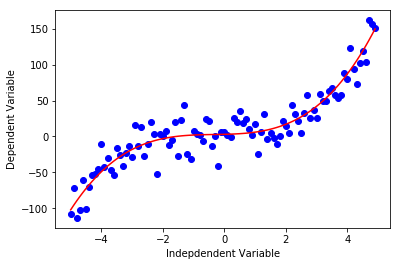

In [4]:
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph
y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

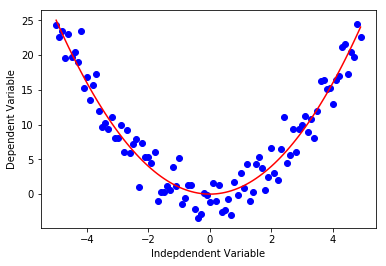

In [5]:
#Quadratic
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph

y = np.power(x,2)
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

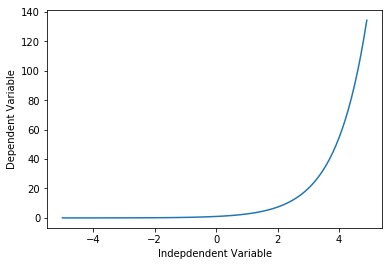

In [6]:
#Exponential
X = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph

Y= np.exp(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

C:\Users\KUMARS\Anaconda3.1\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


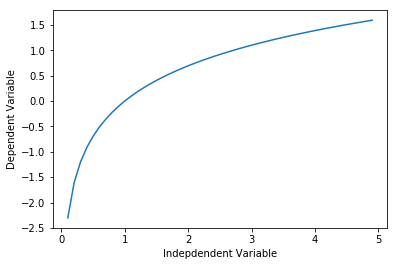

In [8]:
#Logarithmic
X = np.arange(-5.0, 5.0, 0.1)

Y = np.log(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

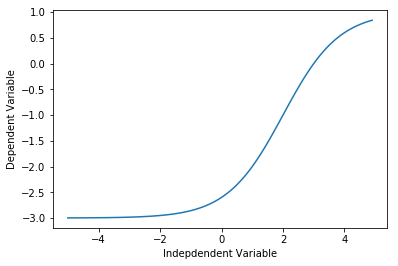

In [11]:
#Sigmodial/Logistic
X = np.arange(-5.0, 5.0, 0.1)


Y = 1-4/(1+np.power(3, X-2))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

In [12]:
#Non-Linear Regression Example
import pandas as pd

df = pd.read_csv("china_gdp.csv")
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


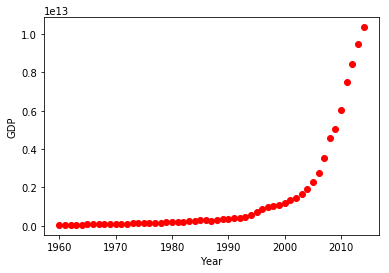

In [13]:
#Plotting the Data set
x_data,y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data,y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

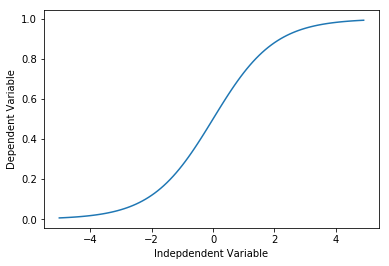

In [14]:
#Choosing Model
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

In [15]:
#Building Model
def sigmod(x,beta1,beta2):
    y = 1 / (1 + np.exp(-beta1*(x-beta2)))
    return y

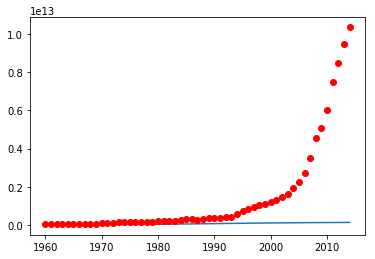

In [17]:
beta1 = 0.10
beta2 = 1990.0

y_pred = sigmod(x_data,beta1,beta2)

plt.plot(x_data,y_pred*150000000000.)
plt.plot(x_data,y_data,'ro')

In [18]:
xdata = x_data/max(x_data)
ydata = y_data/max(y_data)

In [21]:
from scipy.optimize import curve_fitpopt, pcov

In [25]:
popt, pcov = curve_fit(sigmod,xdata,ydata)
popt[0],pcov[1]

(690.4517109916042, array([-2.88118963e-04,  7.25961448e-09]))

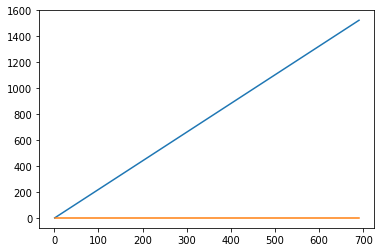

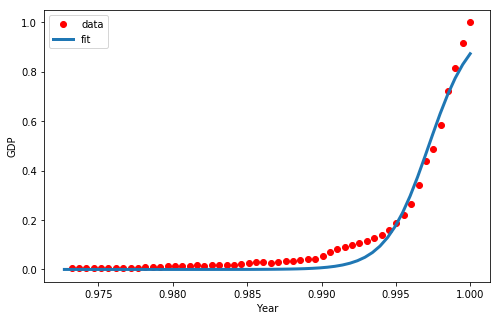

In [28]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmod(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [29]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

In [37]:
# split data into train/test
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# build the model using train set
popt, pcov = curve_fit(sigmod, train_x, train_y)

# predict using test set
y_hat = sigmod(test_x, *popt)

# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )


Mean absolute error: 0.03
Residual sum of squares (MSE): 0.00
R2-score: 0.83


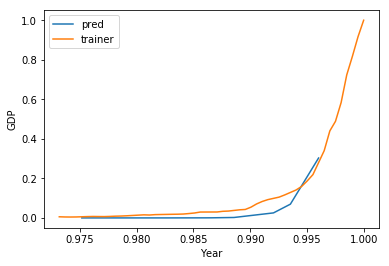

In [43]:
plt.plot(test_x,y_hat,label='pred')
plt.plot(train_x,train_y,label = 'trainer')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.legend(loc='best')
plt.show()